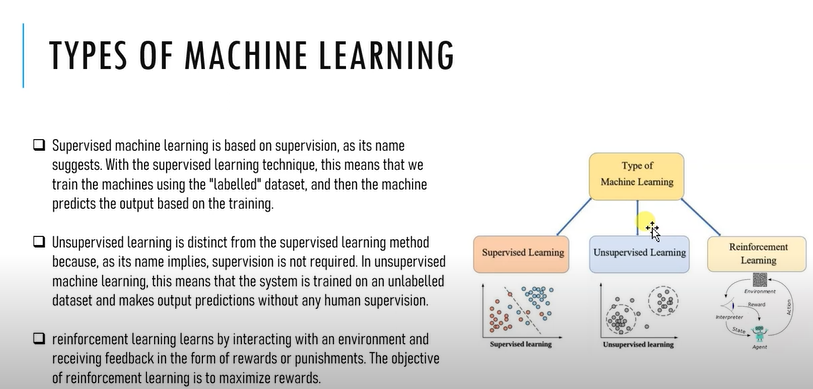

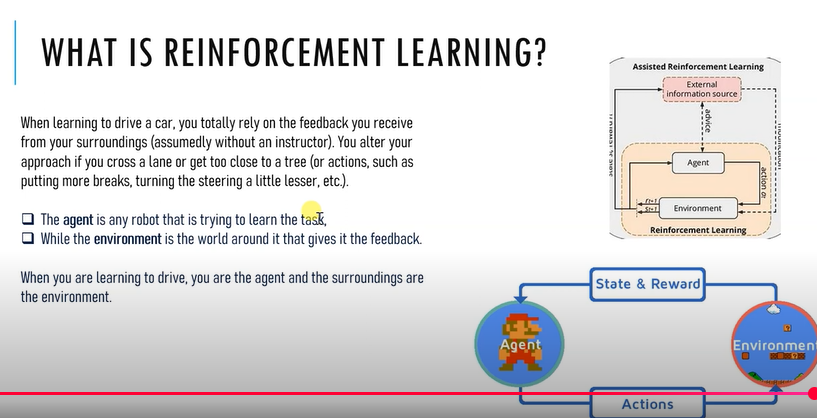

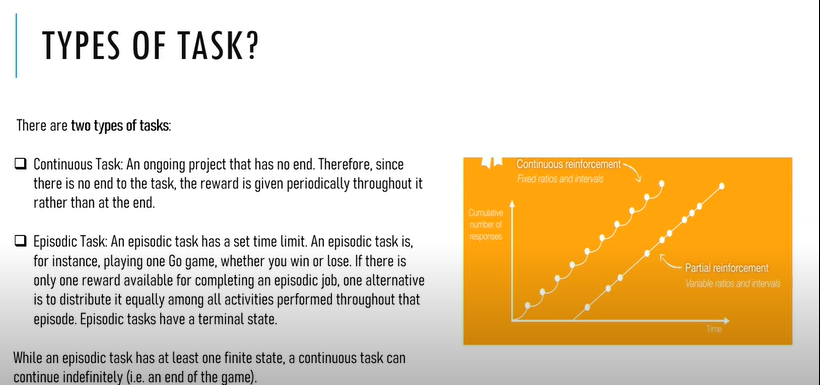

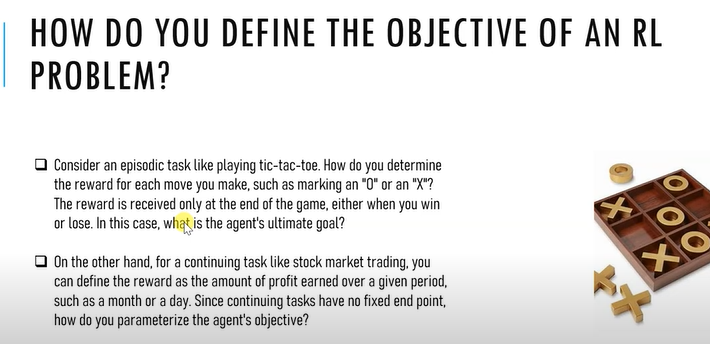

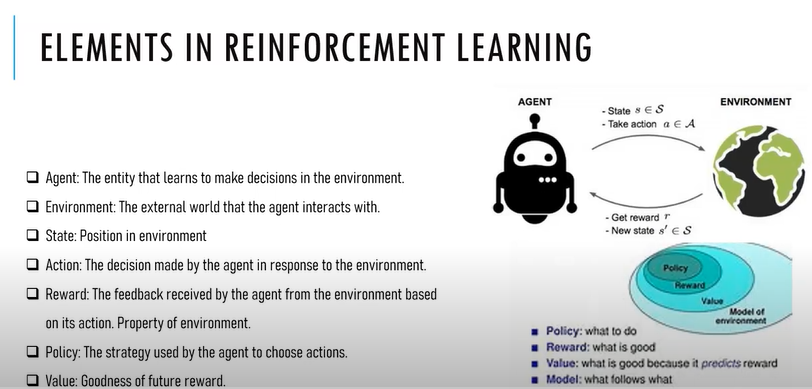

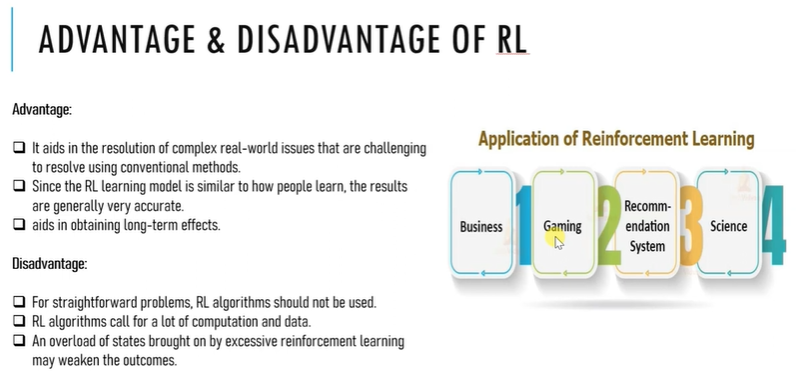

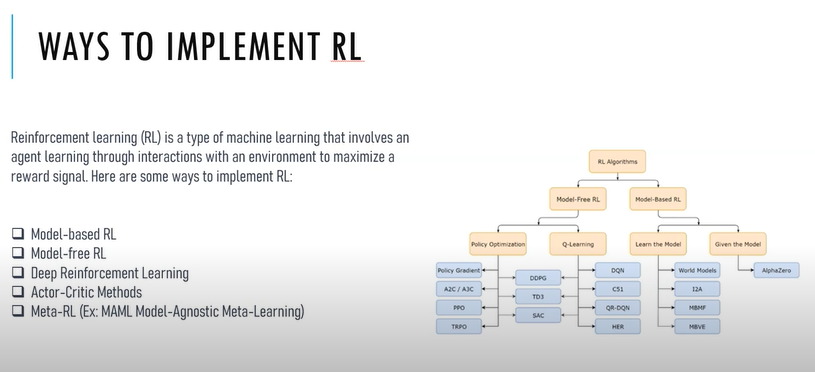

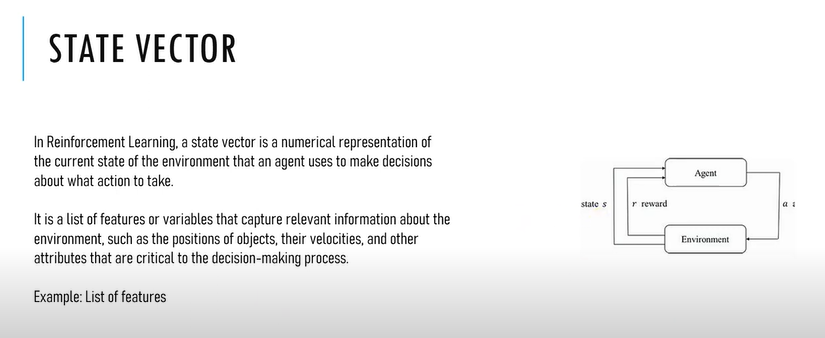

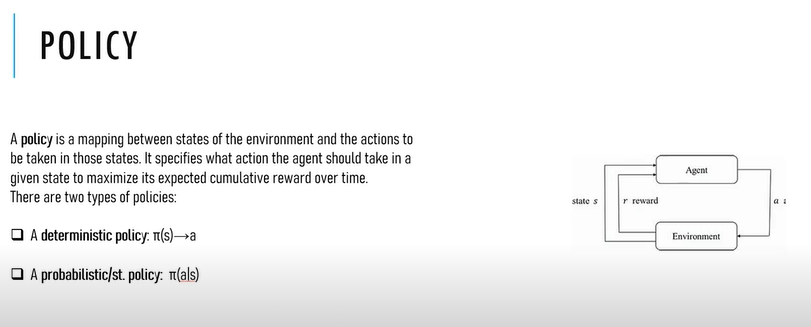

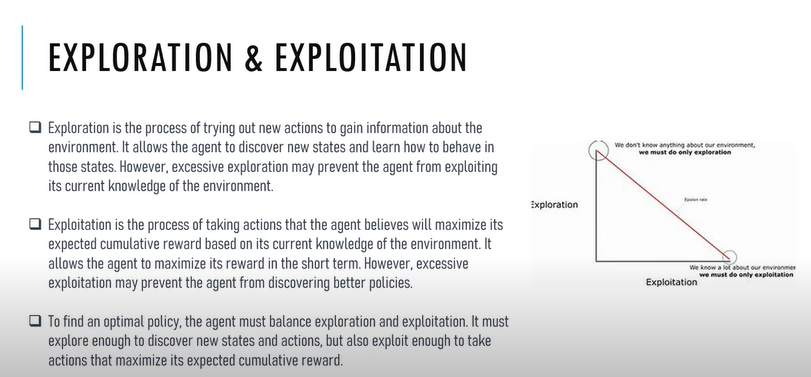

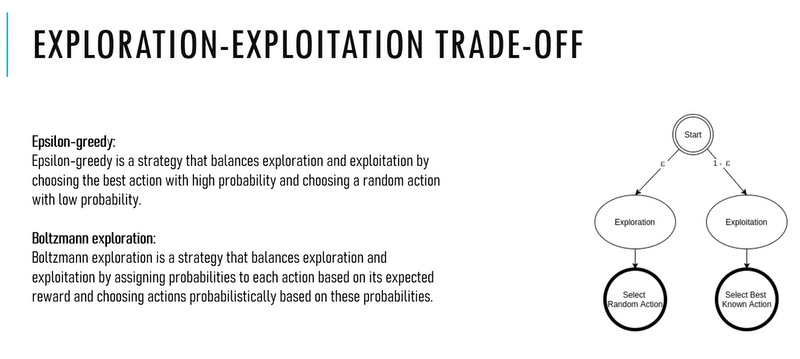

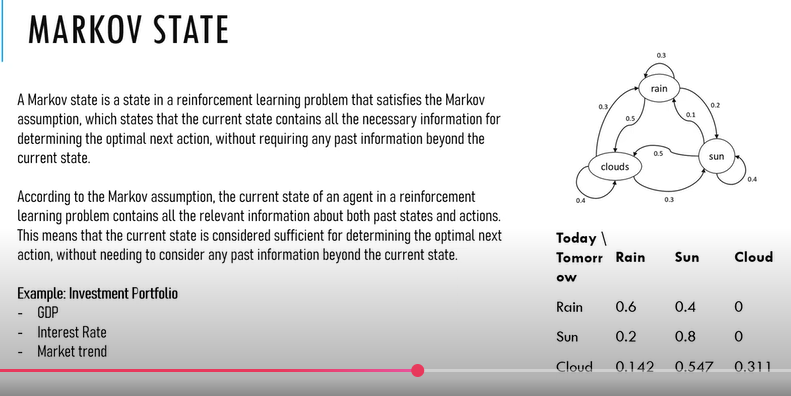

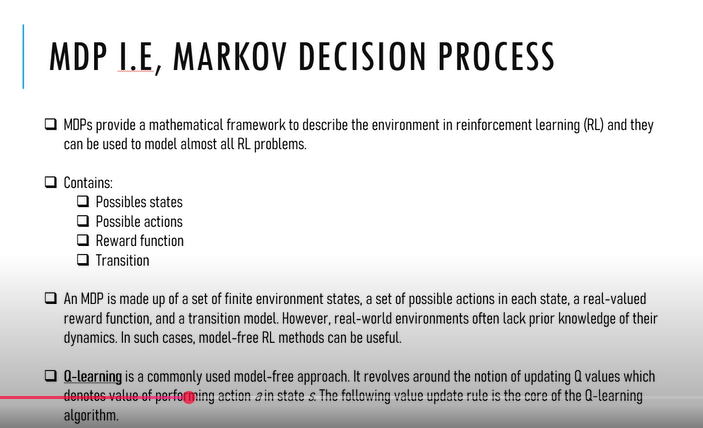

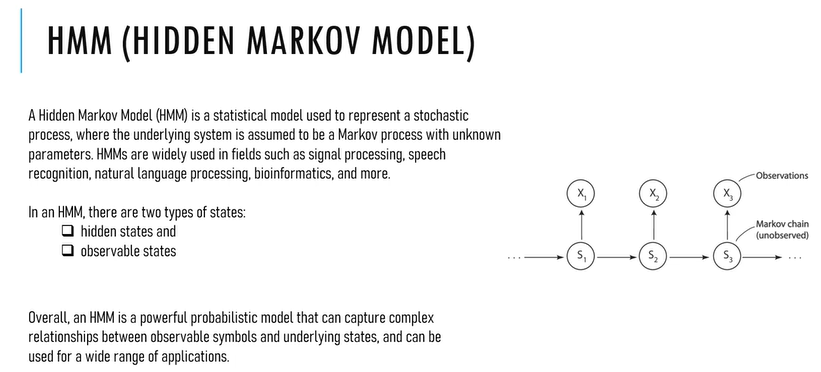

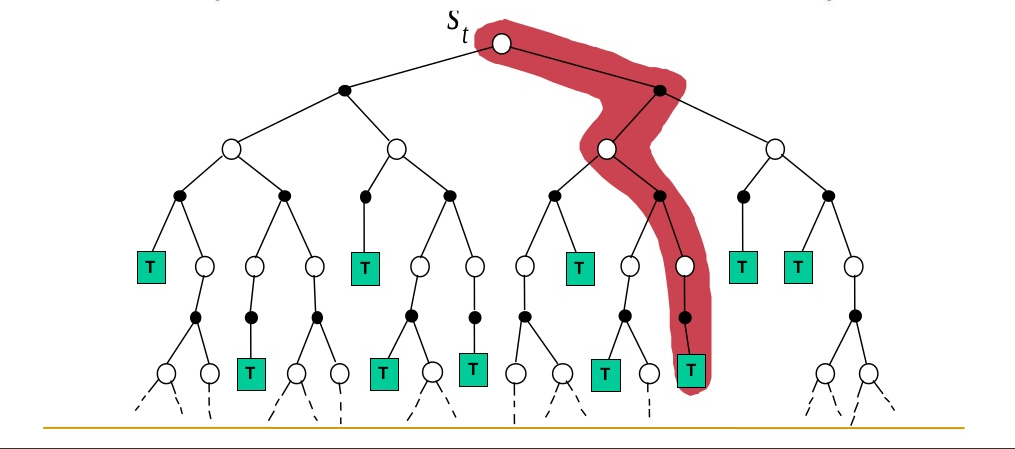

MDP

In [1]:
#Problem Statement: You're going out, do you need umbrella.

#States: Rainy, Cloudy and Sunny
#Actions: Umbrella & No umbrella
#Reward: Dict mapping with each state action pair
#Transition Prob
#Discount Factor

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define the MDP parameters
states = ['Rainy', 'Cloudy', 'Sunny']
actions = ['Umbrella', 'No Umbrella']
rewards = {'Rainy': {'Umbrella': -1, 'No Umbrella': -5},
           'Cloudy': {'Umbrella': -1, 'No Umbrella': -1},
           'Sunny': {'Umbrella': -5, 'No Umbrella': -1}}
transitions = {'Rainy': {'Umbrella': {'Rainy': 0.7, 'Cloudy': 0.3, 'Sunny': 0},
                         'No Umbrella': {'Rainy': 0.3, 'Cloudy': 0.4, 'Sunny': 0.3}},
               'Cloudy': {'Umbrella': {'Rainy': 0.4, 'Cloudy': 0.6, 'Sunny': 0},
                          'No Umbrella': {'Rainy': 0, 'Cloudy': 0.7, 'Sunny': 0.3}},
               'Sunny': {'Umbrella': {'Rainy': 0, 'Cloudy': 0, 'Sunny': 1},
                         'No Umbrella': {'Rainy': 0, 'Cloudy': 0.4, 'Sunny': 0.6}}}
discount_factor = 0.9

transitions >>  interact with environment 

In [4]:
V = {s: 0 for s in states}

In [5]:
V # value for each state

{'Rainy': 0, 'Cloudy': 0, 'Sunny': 0}

In [6]:

#compute the updated value fn for each state
new_V = {}  #initial state value V =   {'Rainy': 0, 'Cloudy': 0, 'Sunny': 0}
for s in states: # initial state
    values = [] 
    print(s)
    print("*")
    for a in actions: # actions in initial state
        print(a)
        value = rewards[s][a] # get reward for action
        print(value)
        print("**")
        for s2 in states: # observe the environment state that is probablity of umbrella and no umbreall in these 3 different state 
            # or transitions  to next state
            print(s2)
            print(V[s2])
            value += discount_factor * transitions[s][a][s2] * V[s2]  #  value for present state = reward from previous action  + (discount factor * state transition probablity * initial state value)
            print(value)
            print("***")
        values.append(value) # value for 3 different transitions states
        print(values)
    new_V[s] = max(values) # update the value function for the current state with max value among 3 transitions states
    print(new_V[s]) 
print(new_V) # {'Rainy': -1.0, 'Cloudy': -1.0, 'Sunny': -1.0}
    

Rainy
*
Umbrella
-1
**
Rainy
0
-1.0
***
Cloudy
0
-1.0
***
Sunny
0
-1.0
***
[-1.0]
No Umbrella
-5
**
Rainy
0
-5.0
***
Cloudy
0
-5.0
***
Sunny
0
-5.0
***
[-1.0, -5.0]
-1.0
Cloudy
*
Umbrella
-1
**
Rainy
0
-1.0
***
Cloudy
0
-1.0
***
Sunny
0
-1.0
***
[-1.0]
No Umbrella
-1
**
Rainy
0
-1.0
***
Cloudy
0
-1.0
***
Sunny
0
-1.0
***
[-1.0, -1.0]
-1.0
Sunny
*
Umbrella
-5
**
Rainy
0
-5.0
***
Cloudy
0
-5.0
***
Sunny
0
-5.0
***
[-5.0]
No Umbrella
-1
**
Rainy
0
-1.0
***
Cloudy
0
-1.0
***
Sunny
0
-1.0
***
[-5.0, -1.0]
-1.0
{'Rainy': -1.0, 'Cloudy': -1.0, 'Sunny': -1.0}


In [7]:
V = {'Rainy': 0, 'Cloudy': 0, 'Sunny': 0} 
new_V = {'Rainy': -9.0, 'Cloudy': -1.0, 'Sunny': 2.0}

In [8]:
[abs(V[s] - new_V[s]) for s in states]


[9.0, 1.0, 2.0]

In [9]:
all([abs(V[s] - new_V[s]) for s in states]) < 0.0001


False

In [10]:
(abs(V[s] - new_V[s]) for s in states) # on the fly generation abstraction

<generator object <genexpr> at 0x00000283D5B931F0>

In [11]:
all(abs(V[s] - new_V[s]) for s in states) < 0.0001

False

In [12]:
new_V

{'Rainy': -9.0, 'Cloudy': -1.0, 'Sunny': 2.0}

In [13]:
values

[-5.0, -1.0]

In [14]:
# Fn for value iter
def value_iteration():
    #init, the value fn for each state to 0 
    V = {s: 0 for s in states}
    while True: # untill if all(abs(V[s] - new_V[s]) < 0.0001 for s in states) is true
        #compute the updated value fn for each state
        new_V = {}
        for s in states:
            values = []
            for a in actions:
                value = rewards[s][a]
                for s2 in states:
                    value += discount_factor * transitions[s][a][s2] * V[s2] # policy value for stae action pair 3 stats 2 action 3x2 matrix
                values.append(value)
            new_V[s] = max(values)
        # Check convergence for present state values
        if all(abs(V[s] - new_V[s]) < 0.0001 for s in states):
            return new_V
        V = new_V

In [15]:
V 

{'Rainy': 0, 'Cloudy': 0, 'Sunny': 0}

In [16]:
V = value_iteration()

In [17]:
V # current state values

{'Rainy': -9.999153585021714,
 'Cloudy': -9.999153585021716,
 'Sunny': -9.999153585021716}

In [18]:
#compute optimal policy
umbrella = []
noumbrella = []
policy = {}
for s in states:
    values = []
    for a in actions:
        value = rewards[s][a]
        for s2 in states:
            value += discount_factor * transitions[s][a][s2] * V[s2] ## policy value for stae action pair 3 stats 2 action 3x2 matrix
        if  a == 'Umbrella':
            umbrella.append(value)
        if a == 'No Umbrella':
            noumbrella.append(value)
        values.append(value)
    policy[s] = actions[np.argmax(values)] # for which action we get the maximum next state value for each initial state

print('values for umbrell action for rainy, cloudy, sunny states : ')
print(umbrella)
print('values for no umbrell action for rainy, cloudy, sunny states : ')
print(noumbrella)
policy_values = np.array([umbrella, noumbrella]).T
print("Policy values:")
print(policy_values)
print("Optimal policy:")
print(policy)

values for umbrell action for rainy, cloudy, sunny states : 
[-9.999238226519545, -9.999238226519545, -13.999238226519545]
values for no umbrell action for rainy, cloudy, sunny states : 
[-13.999238226519545, -9.999238226519545, -9.999238226519545]
Policy values:
[[ -9.99923823 -13.99923823]
 [ -9.99923823  -9.99923823]
 [-13.99923823  -9.99923823]]
Optimal policy:
{'Rainy': 'Umbrella', 'Cloudy': 'Umbrella', 'Sunny': 'No Umbrella'}


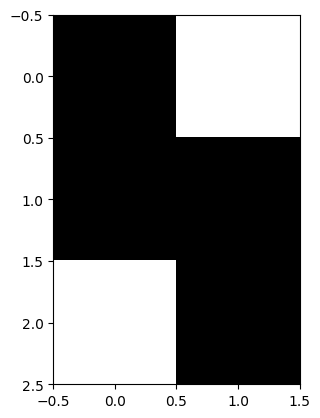

In [19]:
# Plot
policy_values = np.zeros((len(states), len(actions))) # zero initalize 3x2
for i, s in enumerate(states): #3
    for j, a in enumerate(actions): #2
        policy_values[i, j] = rewards[s][a] + discount_factor * sum(transitions[s][a][s2] * V[s2] for s2 in states)
plt.imshow(policy_values, cmap='Greys')

In [20]:
policy_values #  row > state rainy, cloudy , sunny and column > action values  for umbrella noumbrella

array([[ -9.99923823, -13.99923823],
       [ -9.99923823,  -9.99923823],
       [-13.99923823,  -9.99923823]])

In [21]:
policy # action for each state

{'Rainy': 'Umbrella', 'Cloudy': 'Umbrella', 'Sunny': 'No Umbrella'}

HMM

In [22]:
from hmmlearn import hmm

In [23]:
import numpy as np

In [24]:
states = ['Rainy', 'Cloudy', 'Sunny']
n_states = len(states)
observations = ['Umbrella', 'No Umbrella'] # before take action it observe the environment with action probabilities#
# that  the  environment  with which action (probablity) in which state 
n_observations = len(observations)

In [25]:
start_probability = np.array([0.33, 0.33, 0.34]) # initial probability of observation
transition_probability = np.array([[0.7, 0.3, 0.0], # rainy     # probability of observation of env state from initial state 
                                 [0.4, 0.6, 0.0],    # cloudy
                                 [0.0, 0.4, 0.6]])  # sunny
emission_probability = np.array([[0.5, 0.5],   # rainy(umbrella , no umbrella) # probability of observations (probablity of action) taken from initial state
                                [0.9, 0.1],    # cloudy( umbrella, no umbrella)
                                [0.1, 0.9]])  # Sunny (umbrella , no umbrella)

In [26]:
#create hmm object
model = hmm.MultinomialHMM(n_components=n_states, n_iter=100)
model.n_trials = 10
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


In [27]:
X = np.array([[0,0], [1,1], [1,0], [0,1]])

In [28]:

# This line of code uses the trained Hidden Markov Model (HMM) to predict the most likely hidden state sequence given an observation sequence.
# Breakdown:
# model: The trained HMM object.
# predict(): The method used to predict the hidden state sequence.
# [[1,0]]: The observation sequence for which to predict the hidden state.
# Observation Sequence:
# The observation sequence [[1,0]] represents a single observation with two features:
# Feature 1: Value 1
# Feature 2: Value 0

In [29]:
observations_sequence =  [[1,1,],   #[umbrella true, no umbrella true]
                          [1,0,], #[umbrella true ,  no umbrella false]   
                          [0,1,], #[ umbrella false , no  umbrella true]
                          [0,0,]] #[umbrella false, no umbrella false]           

In [30]:
hidden_state = model.predict([[1,0]])

In [31]:
for s in hidden_state:
    print(states[s])

Cloudy


In [32]:
hidden_state = model.predict(observations_sequence)

In [33]:
for s in hidden_state:  # 0:rainy ,1: cloudy ,2: sunny
    print(s)
    print(states[s])

0
Rainy
0
Rainy
0
Rainy
0
Rainy


In [34]:

# Based on the observation sequence [0,1], which indicates "no rain" and "sunshine", the Hidden Markov Model (HMM) would predict the most likely hidden state.
# Possible Hidden States:
# Let's assume the HMM has three hidden states:
# Sunny: Representing a sunny day with no rain.
# Cloudy: Representing a cloudy day with a chance of rain.
# Rainy: Representing a rainy day.
# Prediction:
# Given the observation sequence [0,1], the HMM would predict the hidden state as:
# Sunny
# The reason for this prediction is that the observation sequence [0,1] indicates "no rain" and "sunshine", which is most consistent with the Sunny hidden state.
# Probability Distribution:
# The HMM would output a probability distribution over the hidden states, indicating the confidence in each state. For example:
# Sunny: 0.8 (80% confidence)
# Cloudy: 0.1 (10% confidence)
# Rainy: 0.1 (10% confidence)

In [35]:
import numpy as np
from hmmlearn.hmm import MultinomialHMM

# Define the number of hidden states (weather conditions)
n_states = 3

# Define the number of observations (features)
n_observations = 2

# Define the observation symbols (rain and sunshine)
observation_symbols = {0: 'No Rain', 1: 'Rain'}
sunshine_symbols = {0: 'No Sunshine', 1: 'Sunshine'}

# Define the transition probability matrix (A)
# This represents the probability of transitioning from one weather condition to another
transition_probability = np.array([
    [0.7, 0.2, 0.1],  # Sunny
    [0.1, 0.6, 0.3],  # Cloudy
    [0.2, 0.3, 0.5]   # Rainy
])

# Define the emission probability matrix (B)
# This represents the probability of observing a particular feature given a weather condition
emission_probability = np.array([
    [0.8, 0.2],  # Sunny (no rain, sunshine)
    [0.4, 0.6],  # Cloudy (rain, no sunshine)
    [0.1, 0.9]   # Rainy (rain, no sunshine)
])

# Define the initial state probability distribution (π)
initial_state_probability = np.array([0.6, 0.2, 0.2])

# Create the HMM model
model = MultinomialHMM(n_components=n_states, n_iter=100, tol=0.01)
model.n_trials = 10
model.startprob_ = initial_state_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

# Define the observation sequence
observation_sequence = np.array([[0, 1]])  # No rain, sunshine

# Predict the hidden state sequence
hidden_state_sequence = model.predict(observation_sequence)

print('Hidden State Sequence:', hidden_state_sequence) # 0: sunny, 1: cloudy, 2: rainy

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Hidden State Sequence: [2]


exporation and exploitation

epsilon - greedy

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [37]:
# Example usage
actions = [0, 1, 2]
q_values = [10, 20, 15] # state values
epsilon = 0.1 

In [38]:
# The Epsilon-Greedy policy is a simple and widely used strategy for balancing exploration and exploitation in reinforcement learning. Here's an explanation with code:
# Epsilon-Greedy Policy:
# The Epsilon-Greedy policy works as follows:
# Epsilon (ε): Choose a small probability value, typically between 0 and 1.
# Random Action: With probability ε, choose a random action from the available actions.
# Greedy Action: With probability (1 - ε), choose the action with the highest expected reward (i.e., the greedy action).
# Code Implementation:

In [39]:
rand_val = random.random()

In [40]:
if rand_val < epsilon:
    # Choose a random action
    print(rand_val)
    action = random.choice(actions)
    print(action) # 0 ,1, 2
else:
    # Choose the greedy action
    print(rand_val)
    action = np.argmax(q_values) # 1 for 20
    print(action) # 1

0.49650877529350035
1


In [41]:
n_arms = 10 # The number of arms (or actions) in the bandit problem In this case, n_arms = 10, meaning there are 10 different arms to choose from.
n_steps = 1000 # The number of steps (or time periods) to simulate Here, n_steps = 1000, indicating that the simulation will run for 1000 time periods. to ahieve the target
n_trials = 2000  # The number of independent trials to run. In this case, n_trials = 2000, meaning the simulation will be repeated 2000 times.
epsilons = [0, 0.01, 0.1] # Different values of epsilon to try
# A list of epsilon values to use for the epsilon-greedy algorithm. The epsilon-greedy algorithm chooses the greedy action (i.e., the action with the highest estimated reward) with probability (1 - epsilon) and chooses a random action with probability epsilon. The list epsilons = [0, 0.01, 0.1] specifies three different epsilon values:

In [42]:
arr_reward = np.random.normal(0, 1, size=n_arms) # reward for 10 arms 

In [43]:
arr_reward

array([-0.92587251, -0.65903849,  0.94380773, -0.42608496, -1.64305404,
        0.55000551,  0.1686419 ,  0.84642357,  0.88259959,  0.76178889])

In [44]:
arm_no = 2

In [45]:
reward = np.random.normal(arr_reward[arm_no]) # get reward for arm 2

In [46]:
reward

-1.02841347386568

In [47]:
Q = np.zeros(n_arms)  # initialize q value all set to zero. This array will store the estimated action values from observation environment

In [48]:
Q # q value from observation environment for taking eacch action or each arm like policy value q table

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [49]:
N = np.zeros(n_arms) # all set to zero. This array will store the number of times each action is taken.

In [50]:
N

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [51]:
total_reward = 0 # which will accumulate the total reward earned during the trial.

In [52]:
# which will count the number of times the optimal action is taken.
# These initializations set the stage for a single trial of the multi-armed bandit simulation. The variables will be updated as the simulation progresses.
optimal_action_count = 0

In [53]:
len(Q) # for 10 arms 

10

In [54]:
if np.random.random() < epsilons[1]:
    action = np.random.randint(len(Q)) #If the random number is less than the specified `epsilon` value, the algorithm explores by choosing a random action.
    print(action)
else:
    action = np.argmax(Q)  #If the random number is greater than or equal to `epsilon`, the algorithm exploits by choosing the action with the highest estimated  Q value
    print(action) 

0


In [55]:
action

np.int64(0)

In [56]:
class Bandit:
    def __init__(self, n_arms):
        self.n_arms = n_arms
        self.mean = np.random.normal(0, 1, size=n_arms) # create an array of random rewards for each arm
        # An array of size n_arms representing the mean reward for each arm. The values are randomly generated from a normal distribution with mean 0 and standard deviation 1.
    def pull_arm(self, arm):
        return np.random.normal(self.mean[arm], 1) # get the reward for a specific arm
        # The reward is generated from a normal distribution with mean equal to the mean reward for the specified arm (self.mean[arm]) and standard deviation 1.
    


In [57]:
#Defining epsilon greedy policy
def egp(Q, epsilon):
    if np.random.random() < epsilon:
        return np.random.randint(len(Q))
    else:
        return np.argmax(Q)

In [58]:
# Initialize variables for plotting
average_rewards = np.zeros((len(epsilons), n_steps)) # 3x1000 matrix

In [59]:
average_rewards

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [60]:

optimal_action_pct = np.zeros((len(epsilons), n_steps)) # 3x1000 matrix

In [61]:
# reward - Q[action]: Calculates the difference between the received reward and the current estimated action value.
# (reward - Q[action]) / N[action]: Divides the difference by the number of times the action has been taken (N[action]). This is the incremental update to the action value.
# Q[action] += ...: Adds the incremental update to the current action value.
# Effect:
# This update rule has the following effects:
# Incremental learning: The action value is updated incrementally based on the received reward, rather than being replaced entirely.
# Averaging: The division by N[action] averages the update over the number of times the action has been taken, reducing the impact of individual rewards.
# Convergence: As N[action] increases, the incremental update decreases, allowing the action value to converge to its true value.

In [78]:
n_arms = 3
n_steps = 3
n_trials = 3
epsilons = [0, 0.01, 0.1]

In [81]:
# Initialize variables for plotting
average_rewards = np.zeros((len(epsilons), n_steps)) # 3x3 matrix
optimal_action_pct = np.zeros((len(epsilons), n_steps)) # 3x3 matrix
total_reward_itetation = np.zeros((len(epsilons), n_steps)) # 3x3 matrix
total_optimal_iteration = np.zeros((len(epsilons), n_steps)) # 3x3 matrix


In [ ]:

for i, epsilon in enumerate(epsilons): # for each epsilon
    print("epsilon", epsilon)
    print("*")
    for j in range(n_trials): # for each trials or iterations in one iteration
        print("trial",j)
        bandit = Bandit(n_arms)
        print("bandit_mean",bandit.mean)
        Q = np.zeros(n_arms) # q values for n no of arm or action in one iteration
        N = np.zeros(n_arms) # number of times each arm is selected for arm selection in one iteration
        total_reward = 0 # total reward in one iteration
        optimal_action_count = 0 # number taken optimal  action in one iteration
        print(f"cal q,n,total_reward,optimal_action_count for each trail:{Q},{N},{total_reward},{optimal_action_count}")
        print("**")
        for step in range(n_steps): # for each step in one trail
            print("step", step)
            action = egp(Q, epsilon) # arm selection
            print("action", action)
            reward = bandit.pull_arm(action) # reward for the arm taken in each step towards target
            print("reward", reward)
            total_reward += reward # total reward for all steps for all actions
            print("total_reward",total_reward)
            N[action] += 1 # total no of action taken for each action
            print("N",N)
            Q[action] += (reward - Q[action]) / N[action] # total q value from observation environment for each action like policy value for each action
            print("Q",Q)      # update q table
            # q value updated from previous q value
            bandit_mean = bandit.mean
            print("bandit_mean",bandit_mean)
            optimal_action = np.argmax(bandit_mean) # max_index(array of random rewards for each arm)
            optimal_action_count += (action == optimal_action) # increment 1 when true
            print(f"optimal_action:{optimal_action} and optimal_action_count:{optimal_action_count} for step {step}")
            print("***")

        total_reward_itetation[i] += total_reward # policy value in each trial 
        print(f"total_reward_itetation:{total_reward_itetation}")
        average_rewards[i] += total_reward / n_trials # avr policy value for each iteration  (row -epsilon columns step)
        total_optimal_iteration[i] += optimal_action_count # in each trial
        print(f"total_optimal_iteration:{total_optimal_iteration}")
        optimal_action_pct[i] += optimal_action_count / n_trials
        print(f"average_rewards:{average_rewards}, optimal_action_pct:{optimal_action_pct} for trial {j} for epsilon {epsilon}")
        print(f"cal q,n,total_reward,optimal_action_count for each trail:{Q},{N},{total_reward},{optimal_action_count} for trial {j} empsilon {epsilon}")
        
    print(f"average_rewards:{average_rewards}, optimal_action_pct:{optimal_action_pct} for epsilon {epsilon}")


print(average_rewards)
print(optimal_action_pct)


epsilon 0
*
trial 0
bandit_mean [-1.06201503 -0.39604264  0.06495572]
cal q,n,total_reward,optimal_action_count for each trail:[0. 0. 0.],[0. 0. 0.],0,0
**
step 0
action 0
reward -0.549220068615776
total_reward -0.549220068615776
N [1. 0. 0.]
Q [-0.54922007  0.          0.        ]
bandit_mean [-1.06201503 -0.39604264  0.06495572]
optimal_action:2 and optimal_action_count:0 for step 0
***
step 1
action 1
reward -0.6741710259568829
total_reward -1.223391094572659
N [1. 1. 0.]
Q [-0.54922007 -0.67417103  0.        ]
bandit_mean [-1.06201503 -0.39604264  0.06495572]
optimal_action:2 and optimal_action_count:0 for step 1
***
step 2
action 2
reward 0.9094672958269566
total_reward -0.3139237987457023
N [1. 1. 1.]
Q [-0.54922007 -0.67417103  0.9094673 ]
bandit_mean [-1.06201503 -0.39604264  0.06495572]
optimal_action:2 and optimal_action_count:1 for step 2
***
total_reward_itetation:[[-0.3139238 -0.3139238 -0.3139238]
 [ 0.         0.         0.       ]
 [ 0.         0.         0.       ]]
to

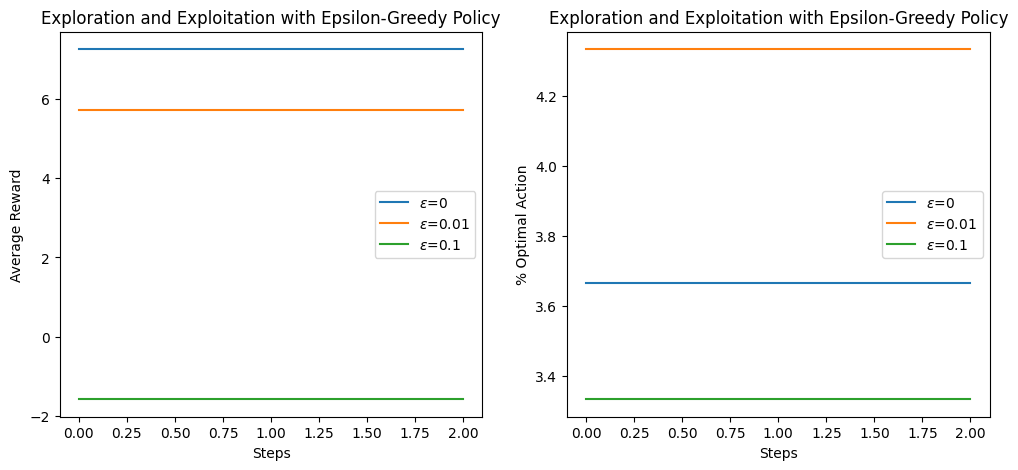

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for i, epsilon in enumerate(epsilons):
    axs[0].plot(average_rewards[i], label="$\epsilon$={}".format(epsilon))
    axs[1].plot(optimal_action_pct[i], label="$\epsilon$={}".format(epsilon))

axs[0].set_xlabel("Steps")
axs[0].set_ylabel("Average Reward")
axs[0].set_title("Exploration and Exploitation with Epsilon-Greedy Policy")
axs[0].legend()

axs[1].set_xlabel("Steps")
axs[1].set_ylabel("% Optimal Action")
axs[1].set_title("Exploration and Exploitation with Epsilon-Greedy Policy")
axs[1].legend()

plt.show()

In [83]:
#Defining boltzman expl. policy
def egp(Q, epsilon):
    exp_Q = np.exp(Q/epsilon)
    prob = exp_Q / np.sum(exp_Q)
    return np.random.choice(len(Q), p = prob)

In [84]:

for i, epsilon in enumerate(epsilons): # for each epsilon
    print("epsilon", epsilon)
    print("*")
    for j in range(n_trials): # for each trials or iterations in one iteration
        print("trial",j)
        bandit = Bandit(n_arms)
        print("bandit_mean",bandit.mean)
        Q = np.zeros(n_arms) # q values for n no of arm or action in one iteration
        N = np.zeros(n_arms) # number of times each arm is selected for arm selection in one iteration
        total_reward = 0 # total reward in one iteration
        optimal_action_count = 0 # number taken optimal  action in one iteration
        print(f"cal q,n,total_reward,optimal_action_count for each trail:{Q},{N},{total_reward},{optimal_action_count}")
        print("**")
        for step in range(n_steps): # for each step in one trail
            print("step", step)
            action = egp(Q, epsilon) # arm selection
            print("action", action)
            reward = bandit.pull_arm(action) # reward for the arm taken in each step towards target
            print("reward", reward)
            total_reward += reward # total reward for all steps for all actions
            print("total_reward",total_reward)
            N[action] += 1 # total no of action taken for each action
            print("N",N)
            Q[action] += (reward - Q[action]) / N[action] # total q value from observation environment for each action like policy value for each action
            print("Q",Q)
            # q value updated from previous q value
            bandit_mean = bandit.mean
            print("bandit_mean",bandit_mean)
            optimal_action = np.argmax(bandit_mean) # max_index(array of random rewards for each arm)
            optimal_action_count += (action == optimal_action) # increment 1 when true
            print(f"optimal_action:{optimal_action} and optimal_action_count:{optimal_action_count} for step {step}")
            print("***")

        total_reward_itetation[i] += total_reward # policy value in each trial 
        print(f"total_reward_itetation:{total_reward_itetation}")
        average_rewards[i] += total_reward / n_trials # avr policy value for each iteration  (row -epsilon columns step)
        total_optimal_iteration[i] += optimal_action_count # in each trial
        print(f"total_optimal_iteration:{total_optimal_iteration}")
        optimal_action_pct[i] += optimal_action_count / n_trials
        print(f"average_rewards:{average_rewards}, optimal_action_pct:{optimal_action_pct} for trial {j} for epsilon {epsilon}")
        print(f"cal q,n,total_reward,optimal_action_count for each trail:{Q},{N},{total_reward},{optimal_action_count} for trial {j} empsilon {epsilon}")
        
    print(f"average_rewards:{average_rewards}, optimal_action_pct:{optimal_action_pct} for epsilon {epsilon}")


print(average_rewards)
print(optimal_action_pct)


epsilon 0
*
trial 0
bandit_mean [-0.1147747   2.3431989  -0.30671897]
cal q,n,total_reward,optimal_action_count for each trail:[0. 0. 0.],[0. 0. 0.],0,0
**
step 0


C:\Users\lenovo\AppData\Local\Temp\ipykernel_4176\3311076676.py:3: RuntimeWarning: invalid value encountered in divide
  exp_Q = np.exp(Q/epsilon)


ValueError: probabilities contain NaN